In [461]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [223]:
# class gradient_descent:
#     def __init__(self,start,learning_rate,gradient,n_iter,tolerance=1e-6):
#         self.start=start
#         self.learning_rate=learning_rate
#         self.gradient=gradient
#         self.n_iter=n_iter
#         self.tolerance=tolerance
        
#     def gradient(self):    
# #def gradient_descent( start, learning_rate,gradient,n_iter,tolerance=1e-6):
#         """
#         --- gradient is the function or any Python callable object that takes a vector and returns the gradient of the 
#             function you’re trying to minimize.
#         --- start is the point where the algorithm starts its search, given as a sequence (tuple, list, NumPy array, and 
#             so on) or scalar (in the case of a one-dimensional problem).
#         --- learn_rate is the learning rate that controls the magnitude of the vector update.
#         --- n_iter is the number of iterations.   
#         --- tolerance (line 4), which specifies the minimal allowed movement in each iteration. 
#         """
#         self.vector=self.start
#         for _ in range(self.n_iter):
#             self.diff= -(self.learning_rate*self.gradient(self.vector))
#             self.vector+=self.diff
#             self.vector_.append(self.vector)
#             if np.all(np.abs(self.diff)<=self.tolerance):
#                 break
#         return self.vector    

gradient_descent() to stop iterating and return the result before n_iter is reached if the vector update in the current iteration is less than or equal to tolerance. This often happens near the minimum, where gradients are usually very small. Unfortunately, it can also happen near a local minimum or a saddle point.

In [409]:
def gradient_descent( start, learning_rate,gradient,n_iter,tolerance=1e-6):
    """
    --- gradient is the function or any Python callable object that takes a vector and returns the gradient of the 
            function you’re trying to minimize.
     --- start is the point where the algorithm starts its search, given as a sequence (tuple, list, NumPy array, and 
            so on) or scalar (in the case of a one-dimensional problem).
     --- learn_rate is the learning rate that controls the magnitude of the vector update.
     --- n_iter is the number of iterations.   
     --- tolerance (line 4), which specifies the minimal allowed movement in each iteration. 
     """
    vector=start
    vector_=[]
    
    for _ in range(n_iter):        
        diff= -(learning_rate*gradient(vector))
        vector+=diff        
        if np.all(np.abs(diff)<=tolerance):
            break
    return vector,vector_    

In [225]:
result=gradient_descent(gradient=lambda v: 2*v,start=10,learning_rate=.2,n_iter=100)
print("Function minima at {}".format(result[0]))

Function minima at 1.3264435183243986e-06


In [226]:
def func(x):
    fx=[]
    for x_ in x:
        f=x_*x_
        fx.append(f)
    return fx

In [227]:
f=func(result[1])

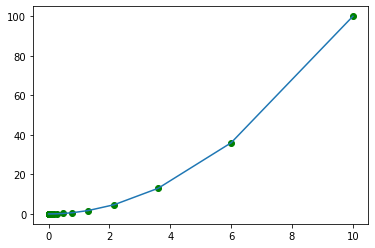

In [228]:
plt.scatter(result[1],f,c="g")
plt.plot(result[1],f)

You start from the rightmost green dot (𝑣 = 10) and move toward the minimum (𝑣 = 0). The updates are larger at first because the value of the gradient (and slope) is higher. As you approach the minimum, they become lower.

### Learning Rate Impact
The learning rate is a very important parameter of the algorithm. Different learning rate values can significantly affect the behavior of gradient descent. 

In [229]:
result=gradient_descent(gradient=lambda v: 2*v,start=10,learning_rate=.8,n_iter=100)
print("Function minima at {}".format(result[0]))

Function minima at 2.865117999580716e-07


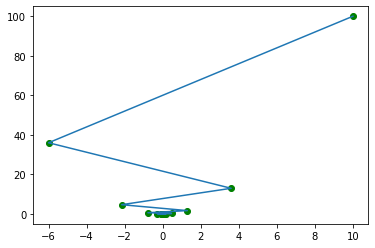

In [230]:
f=func(result[1])
plt.figure()
plt.scatter(result[1],f,c="g")
plt.plot(result[1],f)


You get another solution that’s very close to zero, but the internal behavior of the algorithm is different.
In this case, you again start with 𝑣 = 10, but because of the high learning rate, you get a large change in 𝑣 
that passes to the other side of the optimum and becomes −6. It crosses zero a few more times before settling near it.

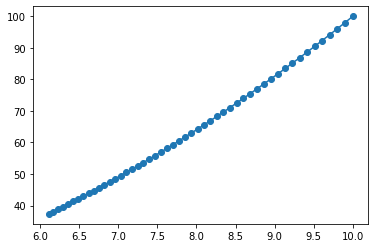

In [198]:
# again change learning rate to a very small number
result=gradient_descent(gradient=lambda v: 2*v,start=10,learning_rate=.005,n_iter=50)
f=func(result[1])
plt.figure()
plt.scatter(result[1],f)
plt.plot(result[1],f)

For small learning rate our algorithm will converge at a very slow rate sometime it 
might not converge till the number of iterations we have specified. However it might converge if we incerase the number of iterations.

Nonconvex functions might have local minima or saddle points where the algorithm can get trapped. In these situations, our choice of learning rate or starting point can make the difference between finding a local minimum and finding the global minimum.

Lets try another function v^4-5*v^2-3*v. 

Function minima at -1.4207567437458342


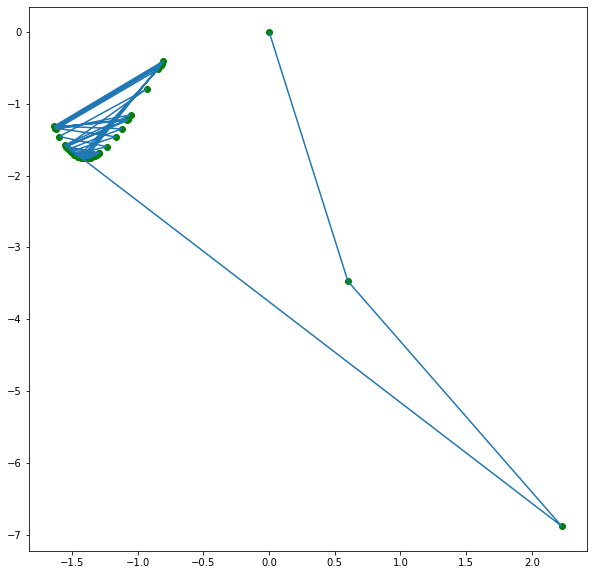

In [231]:
result=gradient_descent(gradient=lambda v: 4 * v**3 - 10 * v - 3, start=0,learning_rate=0.2,n_iter=50)
print("Function minima at {}".format(result[0]))
fx=[]
for v in result[1]:
    f=v**4-5*v**2-3*v
    fx.append(f)
plt.figure(figsize=(10,10))
plt.scatter(result[1],fx,c="g")
plt.plot(result[1],fx)

During the first two iterations, your vector was moving toward the global minimum, 
but then it crossed to the opposite side from around 2.5  and stayed trapped in the local minimum. 
We can prevent this with a smaller learning rate:



Function minima at 1.285401330315467


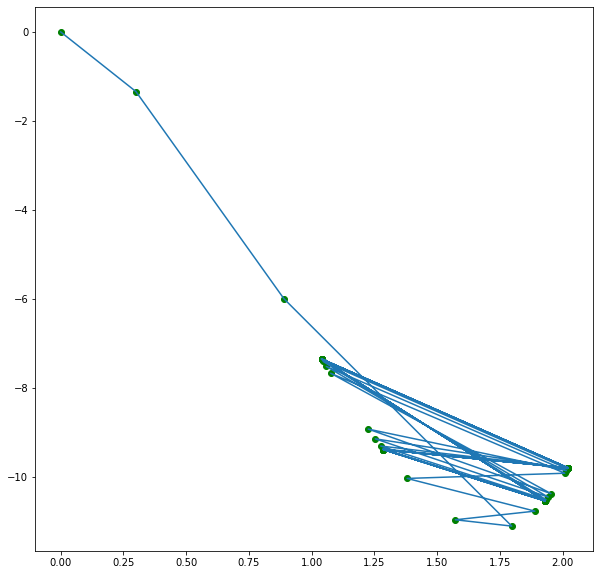

In [232]:
result=gradient_descent(gradient=lambda v: 4 * v**3 - 10 * v - 3, start=0,learning_rate=0.1,n_iter=50)
print("Function minima at {}".format(result[0]))
fx=[]
for v in result[1]:
    f=v**4-5*v**2-3*v
    fx.append(f)
plt.figure(figsize=(10,10))
plt.scatter(result[1],fx,c="g")
plt.plot(result[1],fx)    

When you decrease the learning rate from 0.2 to 0.1, you get a solution very close to the global minimum.A lower learning rate prevents the vector from making large jumps, and in this case, the vector remains closer to the global optimum.

Adjusting the learning rate is tricky. We can’t know the best value in advance. There are many techniques and heuristics that try to help with this. In addition,we often tune the learning rate during model selection and evaluation.

Besides the learning rate, the starting point can affect the solution significantly, especially with nonconvex functions.

We can also use gradient_descent() with functions of more than one variable. The application is the same, but we  need to provide the gradient and starting points as vectors or arrays. for example we want to find the mininum of 𝑣₁² + 𝑣₂⁴. It has the gradient vector (2𝑣₁, 4𝑣₂³):

In [234]:
result=gradient_descent(gradient=lambda v:np.array([2*v[0],4*v[1]**3]), start=np.array([1.0, 1.0]),learning_rate=0.2,n_iter=50)
print("Function minima at {}".format(result[0]))


Function minima at [8.08281277e-12 9.75207120e-02]


The resulting values are almost equal to zero, so you can say that gradient_descent() correctly found that the minimum of this function is at 𝑣₁ = 𝑣₂ = 0.

### Gradient Descent for linear regression  using OLS

linear regression and the ordinary least squares method start with the observed values of the inputs 𝐱 = (𝑥₁, …, 𝑥ᵣ) and outputs 𝑦. They define a linear function 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ, which is as close as possible to 𝑦.

This is an optimization problem. It finds the values of weights 𝑏₀, 𝑏₁, …, 𝑏ᵣ that minimize the sum of squared residuals SSR = Σᵢ(𝑦ᵢ − 𝑓(𝐱ᵢ))² or the mean squared error MSE = SSR / 𝑛. Here, 𝑛 is the total number of observations and 𝑖 = 1, …, 𝑛.

We can also use the cost function 𝐶 = SSR / (2𝑛), which is mathematically more convenient than SSR or MSE.

Lets see simple linear regression. It has only one set of inputs 𝑥 and two weights: 𝑏₀ and 𝑏₁. The equation of the regression line is 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥.

We will use gradient descent to determine them.

First, find the gradient of the cost function 𝐶 = Σᵢ(𝑦ᵢ − 𝑏₀ − 𝑏₁𝑥ᵢ)² / (2𝑛). Since we have two decision variables, 𝑏₀ and 𝑏₁, the gradient ∇𝐶 is a vector with two components:

∂𝐶/∂𝑏₀ = (1/𝑛) Σᵢ(𝑏₀ + 𝑏₁𝑥ᵢ − 𝑦ᵢ) = mean(𝑏₀ + 𝑏₁𝑥ᵢ − 𝑦ᵢ)(This is mean of residuals)
∂𝐶/∂𝑏₁ = (1/𝑛) Σᵢ(𝑏₀ + 𝑏₁𝑥ᵢ − 𝑦ᵢ) 𝑥ᵢ = mean((𝑏₀ + 𝑏₁𝑥ᵢ − 𝑦ᵢ) 𝑥ᵢ)(This is mean of residuals* input)
WE need the values of 𝑥 and 𝑦 to calculate the gradient of this cost function. Our gradient function will have as inputs not only 𝑏₀ and 𝑏₁ but also 𝑥 and 𝑦. This is how it might look:

In [310]:
def cost_function_gradients(x,y,b):
    residual= b[0]+b[1]*x-y
    return residual.mean(),(residual *x).mean()
    

cost_function_gradients() takes the arrays x and y, which contain the observation inputs and outputs, and the array b that holds the current values of the decision variables 𝑏₀ and 𝑏₁. This function first calculates the array of the residuals for each observation (res) and then returns the pair of values of ∂𝐶/∂𝑏₀ and ∂𝐶/∂𝑏₁.

In [462]:
# improved Gradient Descent
def ols_gradient_descent( gradient,x,y,start,learning_rate,n_iter,tolerance=1e-6):
    weights=start
    for _ in range(n_iter):
        diff=-(learning_rate*np.array(gradient(x,y,weights)))
        if np.all(np.abs(diff) <= tolerance):
               break
        weights+=diff
    return weights          
        

In [463]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

ols_gradient_descent( cost_function_gradients,x,y,start=[0.5, 0.5],learning_rate=0.0008,n_iter=100000)

array([5.62822349, 0.54012867])

Lets verify if our Gradient Descent is working appropriately or not by implementing the above toy example using scikit learn

In [464]:
# implementation of Linear Regression using Sklearn
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [465]:
model.fit(x.reshape(-1,1),y)

LinearRegression()

In [466]:
print(model.coef_,model.intercept_)

[0.54] 5.633333333333329


So we can see that our both results are consistent 

### Lets make Gradient descent  more robust, comprehensive, and better-looking without modifying its core functionality:



In [467]:
def gradient_descent(gradient, x, y, start, learning_rate, n_iter=50, tolerance=1e-06):
    
    # check if gradient is callable or not using python inbuilt callable function
    if not callable(gradient):
        raise TypeError("gradient should be callable") 
        # The raise statement allows the programmer to force a specific exception to occur
    # converting x,y into numpy arrays
    x = np.array(x,dtype="float64")
    y = np.array(y,dtype="float64")
    
    if x.shape[0] != y.shape[0]:
        raise ValueError("'x' and 'y' should be of same length")
        
    # initialising the value of weights
    weights=np.array(start, dtype="float64")
    
    # setting up the learning rate
    learning_rate= np.array(learning_rate,dtype="float64")
    #enables you to specify different learning rates for each decision variable by passing a list, tuple, or NumPy array                         
    if np.any(learning_rate<=0): 
        raise ValueError("'learn_rate' must be greater than zero")
        
   # Setting up and checking the maximal number of iterations
    n_iter = int(n_iter)
    if n_iter <= 0:
        raise ValueError("'n_iter' must be greater than zero")

    # Setting up and checking the tolerance
    tolerance = np.array(tolerance, dtype="float64")
    if np.any(tolerance <= 0):
        raise ValueError("'tolerance' must be greater than zero")

    # Performing the gradient descent loop  
    for _ in range(n_iter):
        
        # calculating the step size
        diff=-(learning_rate*np.array(gradient(x,y,weights),dtype="float64"))
        
        # Checking if the absolute difference is small enough
        if np.all(np.abs(diff) <= tolerance):
            break

        # Updating the weights
        weights += diff

    return weights if weights.shape else weights.item()

In [422]:
gradient_descent(cost_function_gradients, x, y, start=[0.5,0.5], learning_rate=0.0008, n_iter=100000, tolerance=1e-06)

array([5.62822349, 0.54012867])

### MiniBatch Stocastic Gradient Descent

* Stochastic gradient descent randomly divides the set of observations into minibatches.
* For each minibatch, the gradient is computed and the vector is moved.
* Once all minibatches are used, you say that the iteration, or epoch, is finished and start the next one.
* This algorithm randomly selects observations for minibatches, 

In [429]:
def sgd(gradient,x,y,start,learning_rate=0.1,batch_size=1,n_iters=50,tolerance=1e-06,random_state=None):
    if not callable(gradient):
        raise TypeError("gradient should be callable") 
        # The raise statement allows the programmer to force a specific exception to occur
    # converting x,y into numpy arrays
    x = np.array(x,dtype="float64")
    y = np.array(y,dtype="float64")
    n_obs=x.shape[0]
    if n_obs != y.shape[0]:
        raise ValueError("'x' and 'y' should be of same length")
    
    # make sure that both x and y become two-dimensional arrays with n_obs rows and that y has exactly one column
    # np.c_ concatenates the columns of x and y into a single array, xy. 
    # This is one way to make data suitable for random selection.
    xy = np.c_[x.reshape(n_obs, -1), y.reshape(n_obs, 1)] #
    # initializing Random number generator
    seed = None if random_state is None else int(random_state)
    rng=np.random.default_rng(seed=seed)#  default_rng() creates an instance of Generator.
    
    # initialize the weights
    weights=np.array(start,dtype="float64")
    
    #setting up learning rate
    learning_rate=np.array(learning_rate,dtype="float64")
    if np.any(learning_rate<0):
        raise ValueError("Learning rate cannot be less than zero")
        
    # setting up and checking the mini batches
    batch_size= int(batch_size)
    if not 0 < batch_size < n_obs:
        raise ValueError("Batch size can not be less than 0 or equal to total number of observations")
        
    # Setting up and checking the maximal number of iterations
    n_iters = int(n_iters)
    if n_iters <= 0:
        raise ValueError("'n_iter' must be greater than zero")

    # Setting up and checking the tolerance
    tolerance = np.array(tolerance, dtype="float64")
    if np.any(tolerance <= 0):
        raise ValueError("'tolerance' must be greater than zero")    
        
    for _ in range(n_iters):
        #shuffle x and y
        rng.shuffle(xy)
        
        #performing minibatch moves
        for start in range(0,n_obs,batch_size):
            stop=start+batch_size
            x_batch,y_batch=xy[start:stop,:-1],xy[start:stop,-1:]
            #calulating the step size
            diff=-learning_rate*np.array(np.array(gradient(x_batch,y_batch,weights),dtype="float64"))
            # Checking if the absolute difference is small enough
            if np.all(np.abs(diff) <= tolerance):
                break

            # Updating the weights
            weights += diff
        
    return weights                          
        
        

In [432]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])
sgd(cost_function_gradients,x,y,start=[0.5,0.5],learning_rate=0.0008,batch_size=3,n_iters=100000,tolerance=1e-06,random_state=None)


array([5.64029553, 0.44418783])

With batch_size, you specify the number of observations in each minibatch. This is an essential parameter for stochastic gradient descent that can significantly affect performance. The result is almost the same as you got with gradient_descent(). If you omit random_state or use None, then you’ll get somewhat different results each time you run sgd() because the random number generator will shuffle xy differently.



### Momentum in Stochastic Gradient Descent

The learning rate can have a significant impact on the result of gradient descent. You can also apply momentum to your algorithm.

You can use momentum to correct the effect of the learning rate. The idea is to remember the previous update of the vector and apply it when calculating the next one. You don’t move the vector exactly in the direction of the negative gradient, but you also tend to keep the direction and magnitude from the previous move.

The parameter called the decay rate or decay factor defines how strong the contribution of the previous update is.

In [433]:
def sgd_momentum(gradient,x,y,start,learning_rate=0.1,decay_rate=0.0,batch_size=1,n_iters=50,tolerance=1e-06,random_state=None):
    if not callable(gradient):
        raise TypeError("gradient should be callable") 
        # The raise statement allows the programmer to force a specific exception to occur
    # converting x,y into numpy arrays
    x = np.array(x,dtype="float64")
    y = np.array(y,dtype="float64")
    n_obs=x.shape[0]
    if n_obs != y.shape[0]:
        raise ValueError("'x' and 'y' should be of same length")
    
    # make sure that both x and y become two-dimensional arrays with n_obs rows and that y has exactly one column
    # np.c_ concatenates the columns of x and y into a single array, xy. 
    # This is one way to make data suitable for random selection.
    xy = np.c_[x.reshape(n_obs, -1), y.reshape(n_obs, 1)] #
    # initializing Random number generator
    seed = None if random_state is None else int(random_state)
    rng=np.random.default_rng(seed=seed)#  default_rng() creates an instance of Generator.
    
    # initialize the weights
    weights=np.array(start,dtype="float64")
    
    #setting up learning rate
    learning_rate=np.array(learning_rate,dtype="float64")
    if np.any(learning_rate<0):
        raise ValueError("Learning rate cannot be less than zero")
        
    # setting up and checking the mini batches
    batch_size= int(batch_size)
    if not 0 < batch_size < n_obs:
        raise ValueError("Batch size can not be less than 0 or equal to total number of observations")
        
    # Setting up and checking the decay rate
    decay_rate = np.array(decay_rate, dtype=dtype_)
    if np.any(decay_rate < 0) or np.any(decay_rate > 1):
        raise ValueError("'decay_rate' must be between zero and one")    
        
    # Setting up and checking the maximal number of iterations
    n_iters = int(n_iters)
    if n_iters <= 0:
        raise ValueError("'n_iter' must be greater than zero")

    # Setting up and checking the tolerance
    tolerance = np.array(tolerance, dtype="float64")
    if np.any(tolerance <= 0):
        raise ValueError("'tolerance' must be greater than zero")  
        
    # Setting the difference to zero for the first iteration
    diff = 0   
    # initialize diff before the iterations start to ensure that it’s available in the first iteration.
        
    for _ in range(n_iters):
        #shuffle x and y
        rng.shuffle(xy)
        
        #performing minibatch moves
        for start in range(0,n_obs,batch_size):
            stop=start+batch_size
            x_batch,y_batch=xy[start:stop,:-1],xy[start:stop,-1:]
            #calulating the step size
            diff=decay_rate * diff - learning_rate*np.array(np.array(gradient(x_batch,y_batch,weights),dtype="float64"))
            # Checking if the absolute difference is small enough
            if np.all(np.abs(diff) <= tolerance):
                break

            # Updating the weights
            weights += diff
        
    return weights                          
        

You recalculate diff with the learning rate and gradient but also add the product of the decay rate and the old value of diff. Now diff has two components:

* decay_rate * diff is the momentum, or impact of the previous move.
* -learn_rate * grad is the impact of the current gradient.
- The decay and learning rates serve as the weights that define the contributions of the two.

### Initialize Start Values Randomly

In [440]:
def sgd_momentum(gradient,x,y,n_vars=None,start=None,learning_rate=0.1,decay_rate=0.0,batch_size=1,n_iters=50,tolerance=1e-06,random_state=None):
    if not callable(gradient):
        raise TypeError("gradient should be callable") 
        # The raise statement allows the programmer to force a specific exception to occur
    # converting x,y into numpy arrays
    x = np.array(x,dtype="float64")
    y = np.array(y,dtype="float64")
    n_obs=x.shape[0]
    if n_obs != y.shape[0]:
        raise ValueError("'x' and 'y' should be of same length")
    
    # make sure that both x and y become two-dimensional arrays with n_obs rows and that y has exactly one column
    # np.c_ concatenates the columns of x and y into a single array, xy. 
    # This is one way to make data suitable for random selection.
    xy = np.c_[x.reshape(n_obs, -1), y.reshape(n_obs, 1)] #
    # initializing Random number generator
    seed = None if random_state is None else int(random_state)
    rng=np.random.default_rng(seed=seed)#  default_rng() creates an instance of Generator.
    
    # initialize the weights
    # initialize the weights
    if start is None:
        weights=rng.normal(size=int(n_vars)).astype("float64")
    else :
        weights=np.array(start,dtype="float64")
    
    #setting up learning rate
    learning_rate=np.array(learning_rate,dtype="float64")
    if np.any(learning_rate<0):
        raise ValueError("Learning rate cannot be less than zero")
        
    # setting up and checking the mini batches
    batch_size= int(batch_size)
    if not 0 < batch_size < n_obs:
        raise ValueError("Batch size can not be less than 0 or equal to total number of observations")
        
    # Setting up and checking the decay rate
    decay_rate = np.array(decay_rate, dtype="float64")
    if np.any(decay_rate < 0) or np.any(decay_rate > 1):
        raise ValueError("'decay_rate' must be between zero and one")    
        
    # Setting up and checking the maximal number of iterations
    n_iters = int(n_iters)
    if n_iters <= 0:
        raise ValueError("'n_iter' must be greater than zero")

    # Setting up and checking the tolerance
    tolerance = np.array(tolerance, dtype="float64")
    if np.any(tolerance <= 0):
        raise ValueError("'tolerance' must be greater than zero")  
        
    # Setting the difference to zero for the first iteration
    diff = 0   
    # initialize diff before the iterations start to ensure that it’s available in the first iteration.
        
    for _ in range(n_iters):
        #shuffle x and y
        rng.shuffle(xy)
        
        #performing minibatch moves
        for start in range(0,n_obs,batch_size):
            stop=start+batch_size
            x_batch,y_batch=xy[start:stop,:-1],xy[start:stop,-1:]
            #calulating the step size
            diff=decay_rate * diff - learning_rate*np.array(np.array(gradient(x_batch,y_batch,weights),dtype="float64"))
            # Checking if the absolute difference is small enough
            if np.all(np.abs(diff) <= tolerance):
                break

            # Updating the weights
            weights += diff
        
    return weights                          
        

In [442]:
sgd_momentum(cost_function_gradients,x,y,n_vars=2,start=None,learning_rate=0.0001,decay_rate=0.8,batch_size=3,n_iters=100000,tolerance=1e-06,random_state=0)

array([5.63014443, 0.53901017])

If you provide a start value other than None, then it’s used for the starting values.
If start is None, then your random number generator creates the starting values using the standard normal distribution and the NumPy method .normal().

* NOTE: This example is taken from this tutorial https://realpython.com/gradient-descent-algorithm-python/